<a href="https://colab.research.google.com/github/John9482/LinearRegression/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# Use the path to your file in Google Drive
data = pd.read_csv('/content/drive/MyDrive/data/traffic.csv')
data.head(12)

,Traffic_Volume,Accident_Frequency
0,500,2
1,1800,4
2,1000,3
3,3200,5
4,1300,2
5,1800,3
6,2500,4
7,3000,5
8,1100,3
9,2600,4


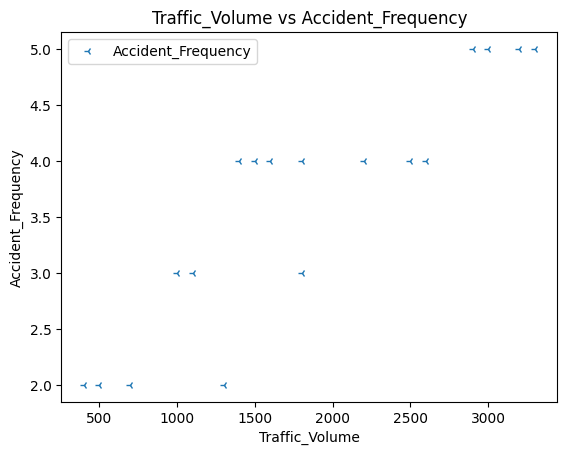

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/data/traffic.csv')
data.plot(x='Traffic_Volume', y='Accident_Frequency', style='3')
plt.title('Traffic_Volume vs Accident_Frequency')
plt.xlabel('Traffic_Volume')
plt.ylabel('Accident_Frequency')
plt.show()

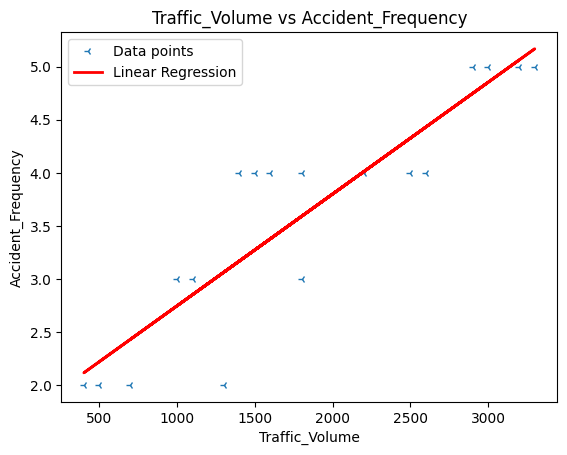

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data=pd.read_csv('/content/drive/MyDrive/data/traffic.csv')
X = data[['Traffic_Volume']]
y = data['Accident_Frequency']
model = LinearRegression()
model.fit(X, y)
data.plot(x='Traffic_Volume', y='Accident_Frequency', style='3', label='Data points')
plt.plot(X, model.predict(X), color='red',linewidth=2, label='Linear Regression')
plt.title('Traffic_Volume vs Accident_Frequency')
plt.xlabel('Traffic_Volume')
plt.ylabel('Accident_Frequency')
plt.legend()
plt.show()


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
data=pd.read_csv('/content/drive/MyDrive/data/traffic.csv')
x = pd.DataFrame(data['Traffic_Volume'])
y = pd.DataFrame(data['Accident_Frequency'])
model = LinearRegression()
model.fit(x, y)
print('Intercept:', model.intercept_)

Intercept: [1.69145713]


In [20]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/data/traffic.csv')
x = pd.DataFrame(data['Traffic_Volume'])
y = pd.DataFrame(data['Accident_Frequency'])


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data=pd.read_csv('/content/drive/MyDrive/data/traffic.csv')
x = pd.DataFrame(data['Traffic_Volume'])
y = pd.DataFrame(data['Accident_Frequency'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14, 1)
(4, 1)
(14, 1)
(4, 1)


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
print(model.intercept_)

[1.7246696]


In [25]:
print(model.coef_)

[[0.00105727]]


In [26]:
y_pred = model.predict(x_test)
y_pred

array([[4.36784141],
       [5.10792952],
       [2.46475771],
       [2.78193833]])

In [27]:
#y_test
#print(y_test)
y_test.head()

,Accident_Frequency
6,4
3,5
13,2
2,3


In [28]:
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 0.289647577092511
Mean Squared Error: 0.10262667624056361
Root Mean Squared Error: 0.3203539858353


In [30]:
import joblib
import pickle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
joblib.dump(model, 'linear_regression_model.pkl')
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [32]:
import joblib
import numpy as np
import pandas as pd
new_x = np.array([4,5,6,7,8]).reshape(-1, 1)
model = joblib.load('linear_regression_model.pkl')
predictions = model.predict(new_x)
new_data = pd.DataFrame({'x': new_x.flatten(), 'Predicted_Y': predictions.flatten()})
print(new_data)

   x  Predicted_Y
0  4     1.728899
1  5     1.729956
2  6     1.731013
3  7     1.732070
4  8     1.733128


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
